In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

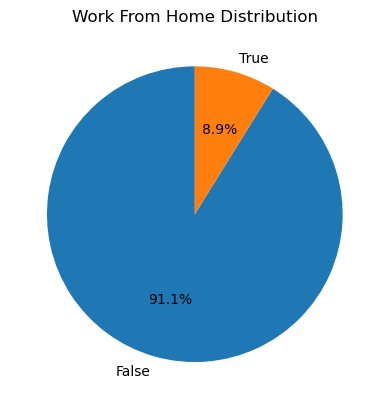

In [3]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle = 90, autopct='%1.1f%%')
plt.title('Work From Home Distribution')
plt.ylabel('')
plt.show()

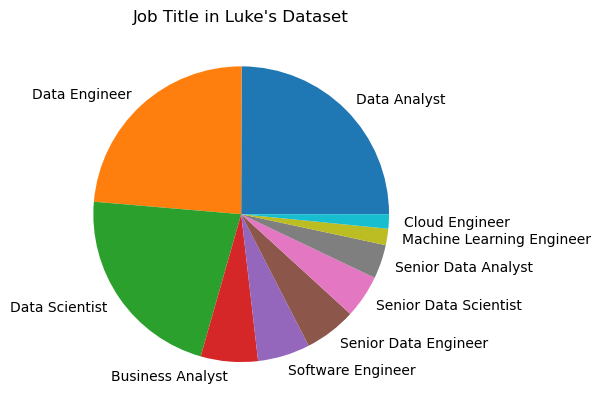

In [4]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title("Job Title in Luke's Dataset")
plt.ylabel('')
plt.show()

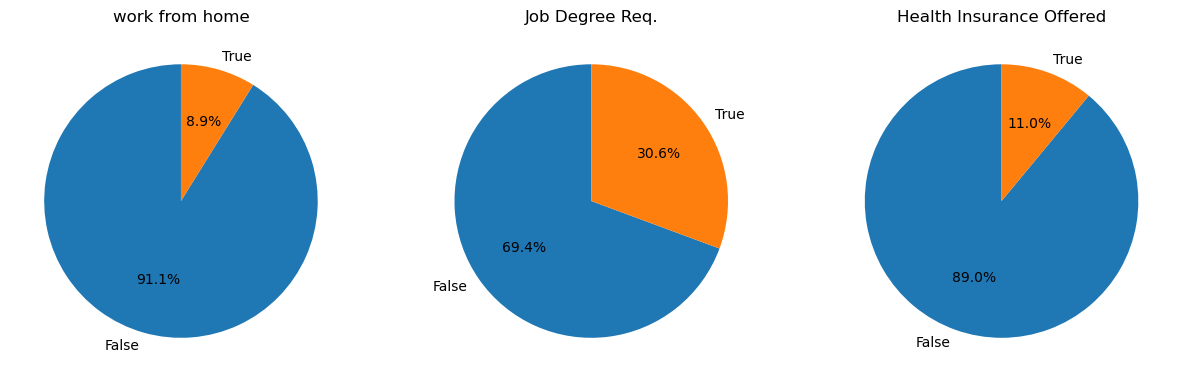

In [5]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)
dict_columns = {
    'job_work_from_home': 'work from home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_columns.items()):
    ax[i].pie(df[column].value_counts(), startangle = 90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)
plt.show()